Wir besorgen uns pulp als linearen Solver, denn der ist frei verfügbar und braucht keine Lizenz

In [9]:
from pulp import *

#solver_list = listSolvers(onlyAvailable=True)
#print(solver_list)

# Die Erstellung des Problems 



Angebotsstellen (Origin)

|  Label    | Menge |
|-----------| ------|
|  O1       |  100    |
|  O2       |  200    |
|  O3       |  100    |

Nachfragestellen (Demand)

|  Label    | Menge |
|-----------| ------|
|  D1       |  80   |
|  D2       |  90   |
|  D3       |  30   |
|  D4       |  70   |
|  D5       |  40   |
|  D6       |  90   |



Bitte erstellen Sie die Angebots- und Nachfragestellen

In [10]:
# Angebotsstellen (Origin) - maximale Liefermenge
O1 = 100
O2 = 200
O3 = 100

# Nachfragestellen (Demand) - benötigte Menge
D1 = 80
D2 = 90
D3 = 30
D4 = 70
D5 = 40
D6 = 90

Die Kosten werden in zwei Teillisten eingegeben: die erste enthält die Kosten für den Versand aus Lager O1 und die zweite die Kosten für den Versand aus Lager O2. 

| Nach / von | O1    | O2    | O3 |
|---         |-------| ------|----|
| D1         | 4     |  6    | 2 |
| D2         | 2     |  3    |3 |
| D3         | 5     |  4    |6 |
| D4         | 2     |  3    |4 |
| D5         | 7     |  7    |8 |
| D6         | 9     |  1    |2 |

Bitte stellen Sie die Kostenmatrix auf. 

In [11]:
# Kostenmatrix: Transportkosten von Origin Oi nach Destination Dj
# Von O1
CO1D1 = 4
CO1D2 = 2
CO1D3 = 5
CO1D4 = 2
CO1D5 = 7
CO1D6 = 9

# Von O2
CO2D1 = 6
CO2D2 = 3
CO2D3 = 4
CO2D4 = 3
CO2D5 = 7
CO2D6 = 1

# Von O3
CO3D1 = 2
CO3D2 = 3
CO3D3 = 6
CO3D4 = 4
CO3D5 = 8
CO3D6 = 2

Die Variablen $x_{oi,dj}$ stellen die Transportmengen von der Angebotsstelle $Oi$ zur Nachfragestelle $Dj$ dar. Die Namensgebung folgt dem Schema `xo{i}d{j}`, wobei $i$ den Index des Ursprungs und $j$ den Index des Ziels angibt. Alle Variablen sind ganzzahlig (Integer) und nicht-negativ ($x_{oi,dj} \geq 0$).

In [12]:
# Entscheidungsvariablen: Transportmenge von Oi nach Dj
# Von O1
xo1d1 = LpVariable('xo1d1', lowBound=0, cat=LpInteger)
xo1d2 = LpVariable('xo1d2', lowBound=0, cat=LpInteger)
xo1d3 = LpVariable('xo1d3', lowBound=0, cat=LpInteger)
xo1d4 = LpVariable('xo1d4', lowBound=0, cat=LpInteger)
xo1d5 = LpVariable('xo1d5', lowBound=0, cat=LpInteger)
xo1d6 = LpVariable('xo1d6', lowBound=0, cat=LpInteger)

# Von O2
xo2d1 = LpVariable('xo2d1', lowBound=0, cat=LpInteger)
xo2d2 = LpVariable('xo2d2', lowBound=0, cat=LpInteger)
xo2d3 = LpVariable('xo2d3', lowBound=0, cat=LpInteger)
xo2d4 = LpVariable('xo2d4', lowBound=0, cat=LpInteger)
xo2d5 = LpVariable('xo2d5', lowBound=0, cat=LpInteger)
xo2d6 = LpVariable('xo2d6', lowBound=0, cat=LpInteger)

# Von O3
xo3d1 = LpVariable('xo3d1', lowBound=0, cat=LpInteger)
xo3d2 = LpVariable('xo3d2', lowBound=0, cat=LpInteger)
xo3d3 = LpVariable('xo3d3', lowBound=0, cat=LpInteger)
xo3d4 = LpVariable('xo3d4', lowBound=0, cat=LpInteger)
xo3d5 = LpVariable('xo3d5', lowBound=0, cat=LpInteger)
xo3d6 = LpVariable('xo3d6', lowBound=0, cat=LpInteger)

Das mathemaische Modell wird als lineares Problem definiert, welches es zu minimieren gilt:

In [13]:
#The prob variable is created using the LpProblem function, with the usual input parameters.
transport_model = LpProblem("Transport_Model", LpMinimize)

Die Zielfunktion wird der Variable *transport_model* mit Hilfe einer Liste hinzugefügt. Die Bedeutung der Zeilfunktion kann als Summe der Kosten multipliziert mit der Menge für jede mögliche Kombination betrachtet werden. 

$$
min \sum\limits_{d∈D,o∈O} c(d,o)x(d,o)
$$

Die Zielfunktion minimiert die gesamten Transportkosten. Sie berechnet sich als Summe aller Kombinationen aus Transportkosten $c(o,d)$ multipliziert mit der jeweiligen Transportmenge $x(o,d)$:

$$\min Z = \sum_{o \in O} \sum_{d \in D} c(o,d) \cdot x(o,d)$$

In [14]:
# The objective function is added to 'transport_model' first
transport_model += (
    CO1D1 * xo1d1 + CO1D2 * xo1d2 + CO1D3 * xo1d3 + CO1D4 * xo1d4 + CO1D5 * xo1d5 + CO1D6 * xo1d6 +
    CO2D1 * xo2d1 + CO2D2 * xo2d2 + CO2D3 * xo2d3 + CO2D4 * xo2d4 + CO2D5 * xo2d5 + CO2D6 * xo2d6 +
    CO3D1 * xo3d1 + CO3D2 * xo3d2 + CO3D3 * xo3d3 + CO3D4 * xo3d4 + CO3D5 * xo3d5 + CO3D6 * xo3d6
), "Z"

Angebotseinschränkungen: Für jeden Ursprung (Origin) werden die Werte der Entscheidungsvariablen (Menge der Transporte) für jeden der Bestimmungsorte (Destination) summiert und dann so eingeschränkt, dass sie kleiner oder gleich dem Angebotsmaximum für diesen Ursprung sind.<p> 
Nachfragebeschränkungen: Für jeden Bestimmungsort werden die Werte der Entscheidungsvariablen von jedem der Ursprünge summiert und dann darauf beschränkt, größer oder gleich dem Nachfrageminimum zu sein.

Exemplarisch für D gilt:
$$
\sum\limits_{o∈O} x(o,d)>=supply_o…∀d∈D
$$

So gilt für O:
$$
\sum\limits_{d∈D} x(o,d)>=demand_d…∀o∈O
$$

**Angebotsrestriktionen:** Die Summe der von einem Ursprung $o$ versendeten Mengen darf das verfügbare Angebot nicht überschreiten:

$$\sum_{d \in D} x(o,d) \leq supply_o \quad \forall \, o \in O$$

**Nachfragerestriktionen:** Die Summe der an einen Bestimmungsort $d$ gelieferten Mengen muss mindestens dem Bedarf entsprechen:

$$\sum_{o \in O} x(o,d) \geq demand_d \quad \forall \, d \in D$$

In [15]:
# Angebotsrestriktionen: Versand aus jedem Ursprung <= verfügbares Angebot
transport_model += xo1d1 + xo1d2 + xo1d3 + xo1d4 + xo1d5 + xo1d6 <= O1
transport_model += xo2d1 + xo2d2 + xo2d3 + xo2d4 + xo2d5 + xo2d6 <= O2
transport_model += xo3d1 + xo3d2 + xo3d3 + xo3d4 + xo3d5 + xo3d6 <= O3

# Nachfragerestriktionen: Lieferung an jeden Bestimmungsort >= Bedarf
transport_model += xo1d1 + xo2d1 + xo3d1 >= D1
transport_model += xo1d2 + xo2d2 + xo3d2 >= D2
transport_model += xo1d3 + xo2d3 + xo3d3 >= D3
transport_model += xo1d4 + xo2d4 + xo3d4 >= D4
transport_model += xo1d5 + xo2d5 + xo3d5 >= D5
transport_model += xo1d6 + xo2d6 + xo3d6 >= D6

Gibt es hier vielleicht eine andere Methode, die Restriktionen zu generieren? Schreiben Sie gerne ihren (Pseuco-)Code in das nächste Feld. 

In [16]:
# Alternative Methode: Restriktionen mit Schleifen und Dictionaries generieren
# 
# origins = ["O1", "O2", "O3"]
# destinations = ["D1", "D2", "D3", "D4", "D5", "D6"]
# supply = {"O1": 100, "O2": 200, "O3": 100}
# demand = {"D1": 80, "D2": 90, "D3": 30, "D4": 70, "D5": 40, "D6": 90}
# costs = {("O1","D1"):4, ("O1","D2"):2, ("O1","D3"):5, ("O1","D4"):2, ("O1","D5"):7, ("O1","D6"):9,
#          ("O2","D1"):6, ("O2","D2"):3, ("O2","D3"):4, ("O2","D4"):3, ("O2","D5"):7, ("O2","D6"):1,
#          ("O3","D1"):2, ("O3","D2"):3, ("O3","D3"):6, ("O3","D4"):4, ("O3","D5"):8, ("O3","D6"):2}
#
# x = LpVariable.dicts("x", [(o,d) for o in origins for d in destinations], lowBound=0, cat=LpInteger)
# model = LpProblem("Transport", LpMinimize)
# model += lpSum(costs[(o,d)] * x[(o,d)] for o in origins for d in destinations)
#
# for o in origins:
#     model += lpSum(x[(o,d)] for d in destinations) <= supply[o], f"Supply_{o}"
# for d in destinations:
#     model += lpSum(x[(o,d)] for o in origins) >= demand[d], f"Demand_{d}"

Die mathematischen Gleichungen sind hier einmal aufgeschlüsselt und die Abbildung zeigt, Wie das ganze dann ausgeschrieben aussieht:

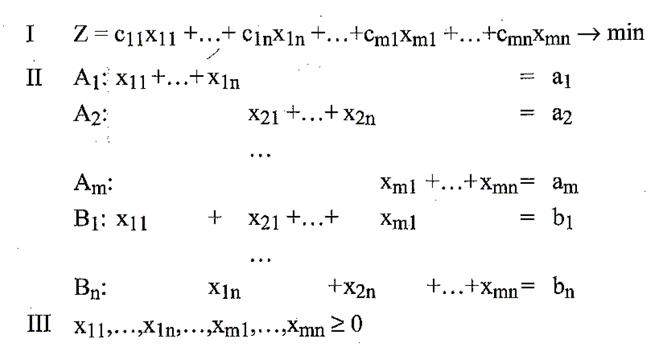

Jetzt das Modell noch lösen, den Status und die Lösung ausgeben 

In [17]:
                   
# The problem data is written to an .lp file
#transport_model.writeLP("BeerDistributionProblem.lp")
# The optimised objective function value is printed to the screen    
print(transport_model)

# The problem is solved using PuLP's choice of Solver
transport_model.solve()

# The status of the solution is printed to the screen
print ("Status:", LpStatus[transport_model.status])

# Each of the variables is printed with it's resolved optimum value
for v in transport_model.variables():
    print (v.name, "=", v.varValue)
    
print ("Total Cost of Transportation = ", value(transport_model.objective))

Transport_Model:
MINIMIZE
4*xo1d1 + 2*xo1d2 + 5*xo1d3 + 2*xo1d4 + 7*xo1d5 + 9*xo1d6 + 6*xo2d1 + 3*xo2d2 + 4*xo2d3 + 3*xo2d4 + 7*xo2d5 + 1*xo2d6 + 2*xo3d1 + 3*xo3d2 + 6*xo3d3 + 4*xo3d4 + 8*xo3d5 + 2*xo3d6 + 0
SUBJECT TO
_C1: xo1d1 + xo1d2 + xo1d3 + xo1d4 + xo1d5 + xo1d6 <= 100

_C2: xo2d1 + xo2d2 + xo2d3 + xo2d4 + xo2d5 + xo2d6 <= 200

_C3: xo3d1 + xo3d2 + xo3d3 + xo3d4 + xo3d5 + xo3d6 <= 100

_C4: xo1d1 + xo2d1 + xo3d1 >= 80

_C5: xo1d2 + xo2d2 + xo3d2 >= 90

_C6: xo1d3 + xo2d3 + xo3d3 >= 30

_C7: xo1d4 + xo2d4 + xo3d4 >= 70

_C8: xo1d5 + xo2d5 + xo3d5 >= 40

_C9: xo1d6 + xo2d6 + xo3d6 >= 90

VARIABLES
0 <= xo1d1 Integer
0 <= xo1d2 Integer
0 <= xo1d3 Integer
0 <= xo1d4 Integer
0 <= xo1d5 Integer
0 <= xo1d6 Integer
0 <= xo2d1 Integer
0 <= xo2d2 Integer
0 <= xo2d3 Integer
0 <= xo2d4 Integer
0 <= xo2d5 Integer
0 <= xo2d6 Integer
0 <= xo3d1 Integer
0 <= xo3d2 Integer
0 <= xo3d3 Integer
0 <= xo3d4 Integer
0 <= xo3d5 Integer
0 <= xo3d6 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3

## **Ergebnis: Optimaler Transportplan**

| Von \ Nach | D1 | D2 | D3 | D4 | D5 | D6 | **Σ Versand** | **Kapazität** |
|---|---|---|---|---|---|---|---|---|
| **O1** | 0 | 70 | 0 | 30 | 0 | 0 | **100** | 100 |
| **O2** | 0 | 0 | 30 | 40 | 40 | 90 | **200** | 200 |
| **O3** | 80 | 20 | 0 | 0 | 0 | 0 | **100** | 100 |
| **Σ Empfang** | **80** | **90** | **30** | **70** | **40** | **90** | | |
| **Bedarf** | 80 | 90 | 30 | 70 | 40 | 90 | | |

### Minimale Gesamttransportkosten: **1.030 €**

### Interpretation:
- **O1** liefert 70 Einheiten an D2 (Kosten: 2) und 30 Einheiten an D4 (Kosten: 2) → nutzt günstige Routen vollständig aus.
- **O2** deckt den gesamten Bedarf von D3, D5 und D6, sowie 40 Einheiten für D4. Besonders die Route O2→D6 (Kosten: 1) ist die günstigste im gesamten Netzwerk.
- **O3** versorgt vollständig D1 (Kosten: 2) und liefert die restlichen 20 Einheiten an D2 (Kosten: 3).
- Alle Kapazitäten werden **vollständig genutzt** (Gesamtangebot = Gesamtnachfrage = 400).